Encoder : 중요한 정보를 포함하는 작은 크기의 노드로 축소  
적용 : 노이즈제거, 이미지압축, 부정거래 감지, 차원축소  
데이터 크기에 비해서 어느 정도 인코딩하는 게 적당한가? : 1/10에서 1/3  tsaq
-> Variational Autoencoder, Manifold learning  
padding이 same이면 차원은 유지된다.  
Output = (Input - Filter_size + 1 ) / Stride(or Pool_size)  -> padding이 valid일 때만  
Input : (28, 28, 1)  
Filter_size = (3, 3) -> 3  
Stride = (1, 1) -> 1  
Output = (28 - 3 + 1) / 1 = 26  

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape # 흑백

(60000, 28, 28)

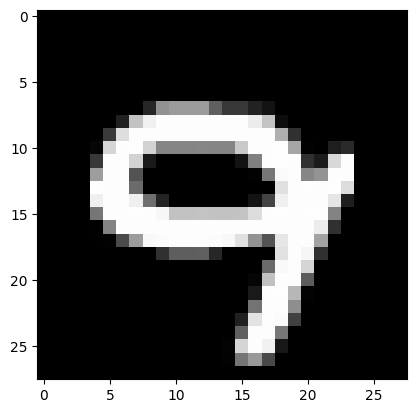

In [ ]:
i = np.random.randint(0, 59999)
plt.imshow(X_train[i], cmap='gray');

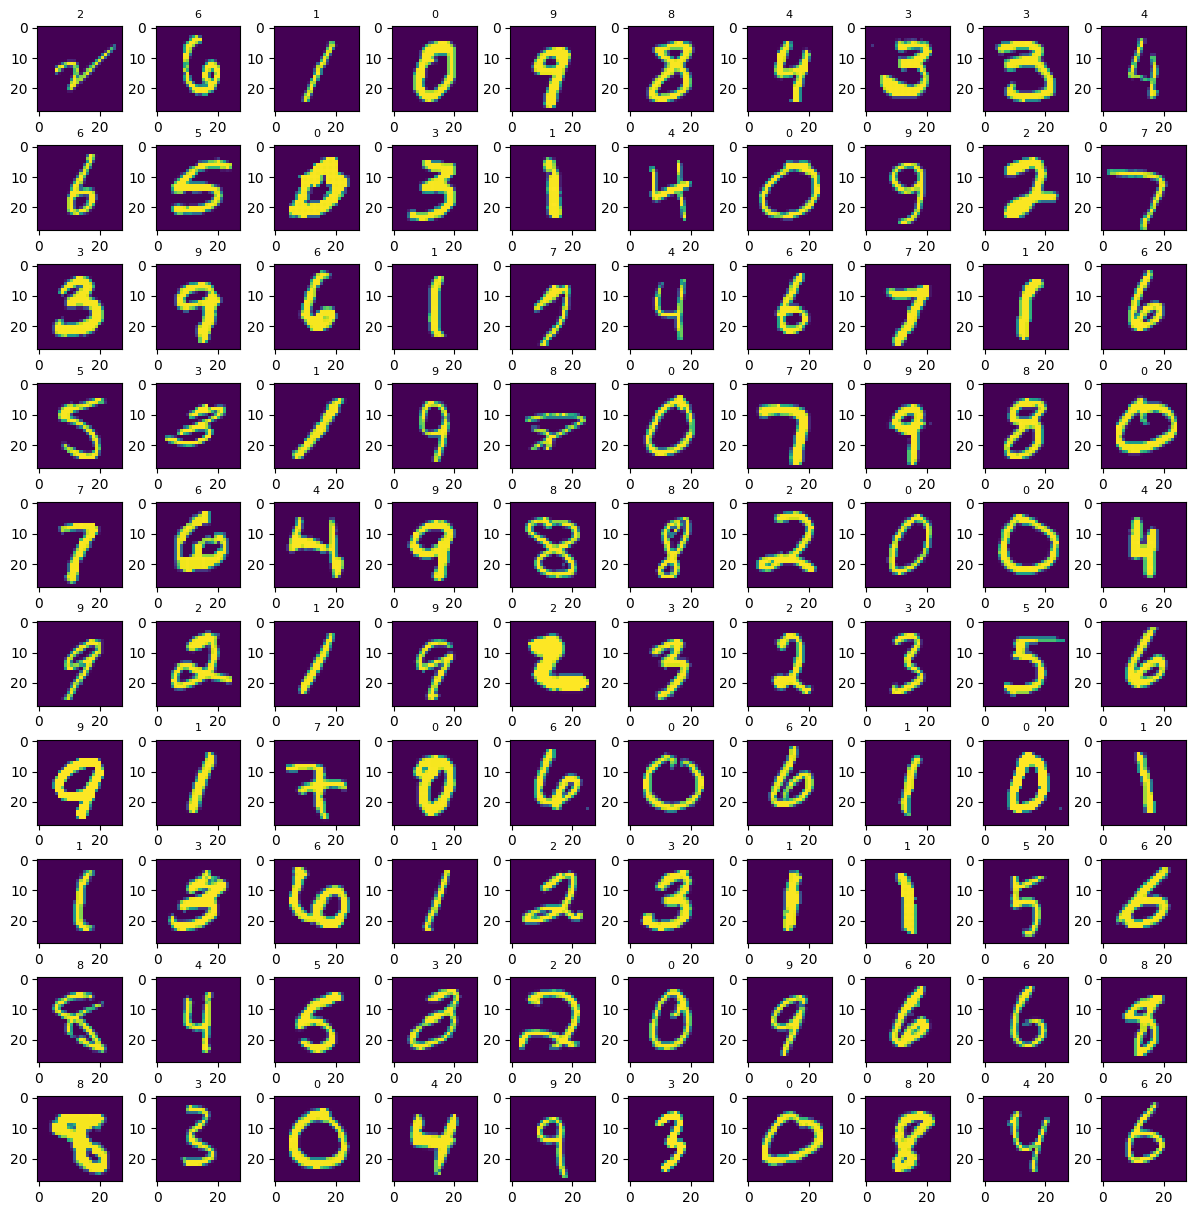

In [ ]:
width = height = 10
fig, axes = plt.subplots(height, width, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, width*height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index], fontsize=8)

plt.subplots_adjust(hspace=0.4)

In [ ]:
X_train = X_train/255 #정규화
X_test = X_test/255
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
X_train.shape

(60000, 784)

In [ ]:
#784 - 128 - 64 - 32 - 64 - 128 - 784
autoencoder = Sequential()

autoencoder.add(Dense(units=128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu'))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
autoencoder.add(Dense(units=784, activation='sigmoid')) #0부터 1까지 출력하기 때문에 적합함
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=50) #출력값이 입력값과 같아야 하는 문제이기 때문

Epoch 1/50
1875/1875 [==============================] - 21s 10ms/step - loss: 0.1509 - accuracy: 0.0107
Epoch 2/50
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1077 - accuracy: 0.0122
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0994 - accuracy: 0.0125
Epoch 4/50
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0950 - accuracy: 0.0140
Epoch 5/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0922 - accuracy: 0.0143
Epoch 6/50
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0900 - accuracy: 0.0149
Epoch 7/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0883 - accuracy: 0.0153
Epoch 8/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0870 - accuracy: 0.0146
Epoch 9/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0860 - accuracy: 0.0155
Epoch 10/50
1875/1875 [==============================] - 18s 10ms/

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output) #32로 인코딩하고 있는 layer를 입력
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

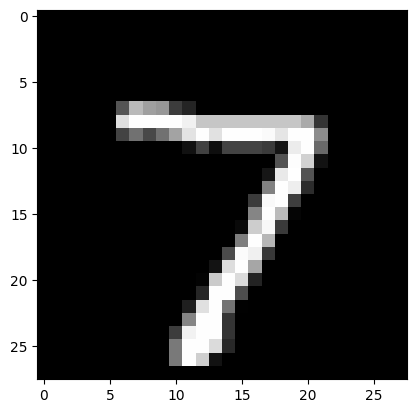

In [ ]:
plt.imshow(X_test[0].reshape(28,28),cmap='gray')

In [ ]:
encoder_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 123ms/step


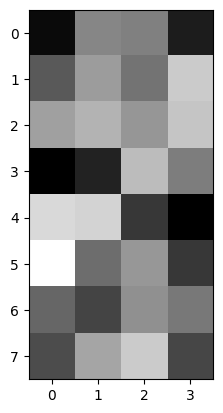

In [ ]:
plt.imshow(encoder_image.reshape(8,4), cmap='gray')

In [ ]:
input_layer_decoder = Input(shape=(32,))
decode_layer1 = autoencoder.layers[3]
decode_layer2 = autoencoder.layers[4]
decode_layer3 = autoencoder.layers[5]
decode = Model(inputs = input_layer_decoder, outputs = decode_layer3(decode_layer2(decode_layer1(input_layer_decoder))))
decode.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
decoded_image = decode.predict(encoder_image)
decoded_image.shape

1/1 [==============================] - 0s 62ms/step


(1, 784)

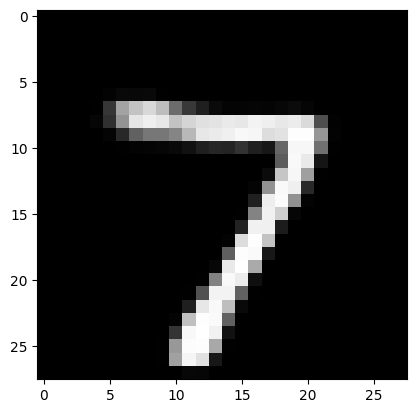

In [ ]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray')
plt.imshow(decoded_image.reshape(28,28), cmap='gray')

## 합성곱 encoder


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


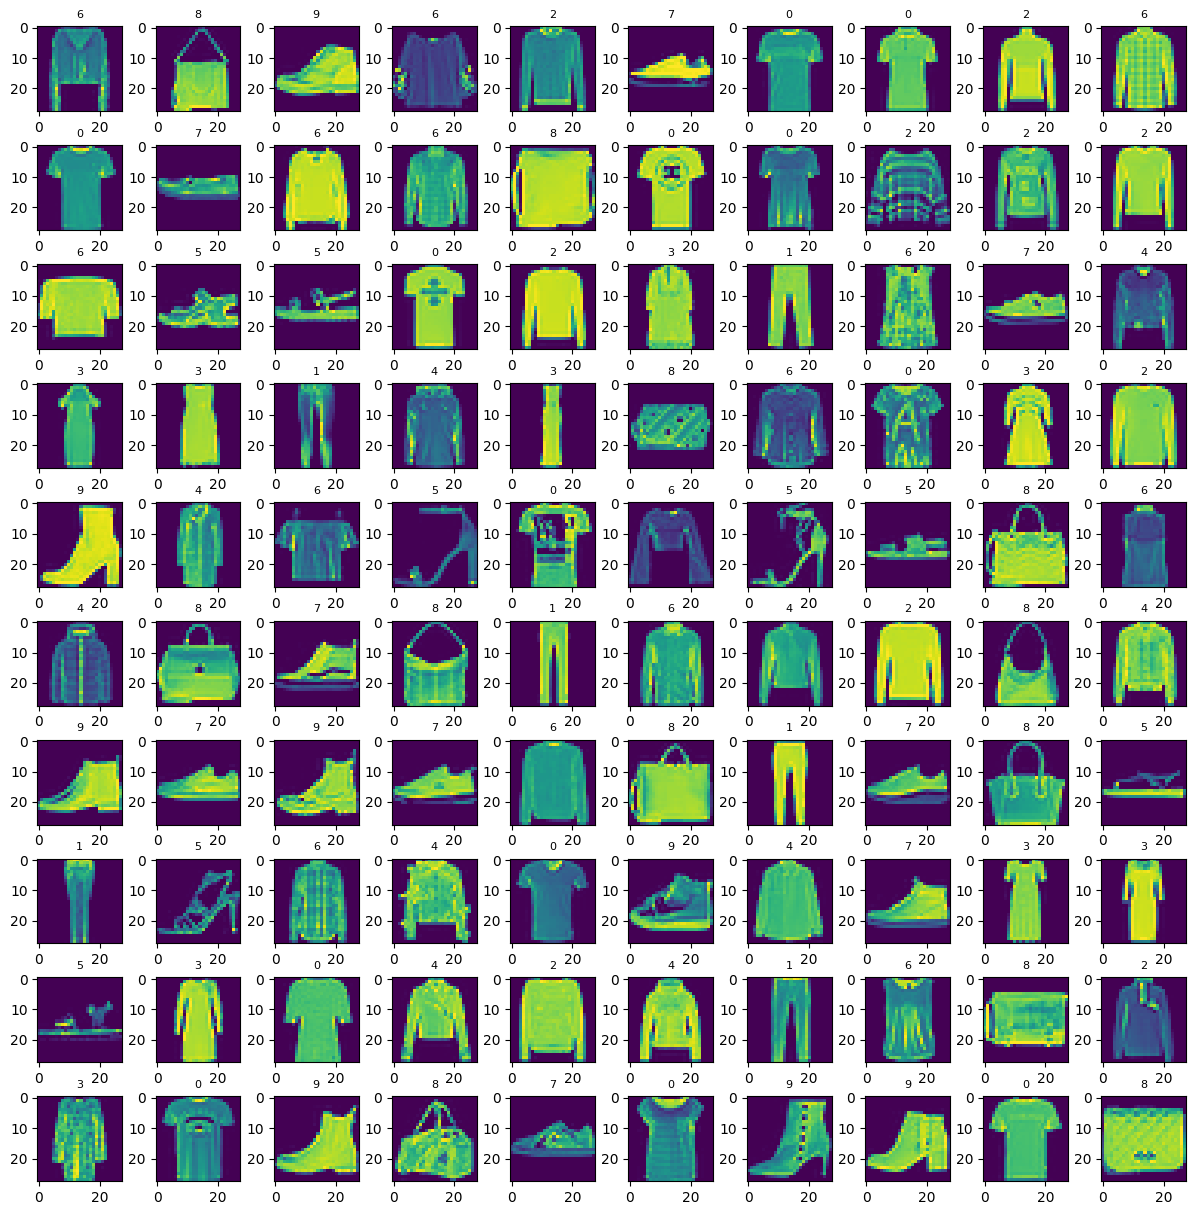

In [ ]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = height = 10

fig, axes = plt.subplots(height, width, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, width*height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index], fontsize=8)

plt.subplots_adjust(hspace=0.4)

In [ ]:
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape((len(X_train), 28,28, 1))
X_train = X_train.reshape((len(X_train), 28,28, 1))

In [ ]:
autoencoder = Sequential( )

#Encoder

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding='same'))

autoencoder.add(Conv2D(filters=8,kernel_size=(2,2),activation='relu', strides=(2,2), padding='same'))
autoencoder.add(Flatten())

#Decoder

autoencoder.add(Reshape((4,4,8)) )
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2))) #MaxPooling과 값이 정확히 같지 않아도 됨
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2))) #MaxPooling과 값이 정확히 같지 않아도 됨
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))
autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_58 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 7, 7, 8)           0         
 ng2D)                                                           
                                                                 
 conv2d_60 (Conv2D)          (None, 4, 4, 8)           264       
                                                                 
 flatten_9 (Flatten)         (None, 128)             

In [ ]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 69s 36ms/step - loss: 0.3176 - accuracy: 0.5027
Epoch 2/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2931 - accuracy: 0.5054
Epoch 3/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2884 - accuracy: 0.5061
Epoch 4/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2859 - accuracy: 0.5064
Epoch 5/50
1875/1875 [==============================] - 68s 36ms/step - loss: 0.2840 - accuracy: 0.5067
Epoch 6/50
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2825 - accuracy: 0.5069
Epoch 7/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2813 - accuracy: 0.5071
Epoch 8/50
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2803 - accuracy: 0.5072
Epoch 9/50
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2794 - accuracy: 0.5073
Epoch 10/50
1875/1875 [==============================] - 65s 35m

In [ ]:
encoded_test_images = encoder.predict(X_test)
encoded_test_images.shape

In [ ]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

In [ ]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0]-1, size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  ax = plt.subplot(10,10, i+1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.xticks(())
  ax = plt.subplot(10,10, i+1+n_images)
  plt.imshow(encoded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.xticks(())
  ax = plt.subplot(10,10, i+1+2*n_images)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.xticks(())